### Data pre-processing

In [4]:
import sklearn
assert sklearn.__version__ >= "0.2"
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
pokemon = pd.read_csv('pokemon_alopez247.csv')

In [6]:
pokemon['Type_2'].fillna("None", inplace = True)
pokemon['Egg_Group_2'].fillna("None", inplace = True)
pokemon['Pr_Male'].fillna(999, inplace = True)

pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            721 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           721 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [7]:
pokemon.drop(['Number', 'Name'], axis=1, inplace=True)

In [8]:
numerical_cols = list(pokemon.select_dtypes(include='number').columns)
categorical_cols = list(pokemon.select_dtypes(exclude='number').columns)

In [9]:
pokemon[categorical_cols] = OrdinalEncoder().fit_transform(pokemon[categorical_cols]).astype(int)

In [10]:
pokemon = pd.DataFrame(MinMaxScaler().fit_transform(pokemon), columns=pokemon.columns)

In [11]:
pokemon_x, pokemon_y = pokemon.drop(['isLegendary'], axis=1), pokemon['isLegendary']
x_train, x_test, y_train, y_test = train_test_split(pokemon_x, pokemon_y, test_size = 0.2, random_state = 42)

In [12]:
pokemon.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,0.529412,0.777778,0.255556,0.173228,0.27500,0.195556,0.381944,0.214286,0.258065,0.0,...,0.333333,1.0,0.000876,0.714286,0.461538,0.0,0.042361,0.007159,0.166667,0.692308
1,0.529412,0.777778,0.416667,0.232283,0.35625,0.257778,0.486111,0.285714,0.354839,0.0,...,0.333333,1.0,0.000876,0.714286,0.461538,0.0,0.061806,0.013580,0.166667,0.692308
2,0.529412,0.777778,0.638889,0.311024,0.48125,0.346667,0.625000,0.380952,0.483871,0.0,...,0.333333,1.0,0.000876,0.714286,0.461538,1.0,0.132639,0.105169,0.166667,0.692308
3,0.352941,0.666667,0.238889,0.149606,0.29375,0.168889,0.347222,0.142857,0.387097,0.0,...,0.777778,1.0,0.000876,0.714286,0.153846,0.0,0.035417,0.008843,0.166667,0.000000
4,0.352941,0.666667,0.416667,0.224409,0.36875,0.235556,0.486111,0.214286,0.483871,0.0,...,0.777778,1.0,0.000876,0.714286,0.153846,0.0,0.068750,0.019897,0.166667,0.000000


In [21]:
import seaborn as sns

def plot_matrix(conf_matrix):
    ax = sns.heatmap(conf_matrix, annot=True, cmap='Reds')

    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted isLengendary')
    ax.set_ylabel('Actual Legendary Category');

    # ticket labels - list must be in numerical order
    ax.xaxis.set_ticklabels(['Not Legendary','Legendary'])
    ax.yaxis.set_ticklabels(['Not Legendary','Legendary'])

    # display the visualization of the Confusion Matrix.
    plt.show()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

# helper function:
def calculate_metrics(matrix,y_test,predicted):
    # Using the method evalMetric function defined in Week 3 to calculate accuracy, precision, recall, and f-1
    
    #importing accuracy_score, precision_score, recall_score, f1_score
    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, predicted, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, predicted, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, predicted, average='weighted')))
    
    # Print the TP, TN, FP, FN
    TP = matrix[0,0]
    FN = matrix[0,1]
    FP = matrix[1,0]
    TN = matrix[1,1]

    print("TP: " + str(TP))
    print("FN: " + str(FN))
    print("FP: " + str(FP))
    print("TN: " + str(TN))

    # Calculating the specificity = TN/(TN+TP)
    specificity = TN/(TN+TP)
    print("Specificity: " + str(specificity))

    # Calculating the sensitivity = TP/(TP+FN)
    sensitivity = TP/(TP+FN)
    print("Sensitivity: " + str(sensitivity))

    # calculating the AUC
    fpr, tpr, threshold = roc_curve(y_test, predicted)
    mul_auc = auc(fpr, tpr)
    print("The AUC is: " + str(mul_auc))

### Lab 10: Multilayer Perceptron

Fold:  1, Training/Test Split Distribution: [545  38], Accuracy: 1.000
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 541
FN: 4
FP: 0
TN: 38
Specificity: 0.06563039723661486
Sensitivity: 0.9926605504587156
The AUC is: 0.9963302752293578


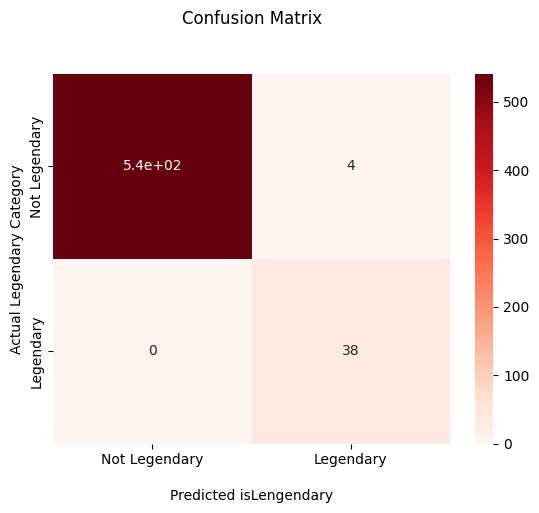

Fold:  2, Training/Test Split Distribution: [545  38], Accuracy: 0.969
Weighted Precision: 0.98
Weighted Recall: 0.97
Weighted F1-score: 0.97
TP: 525
FN: 20
FP: 0
TN: 38
Specificity: 0.0674955595026643
Sensitivity: 0.963302752293578
The AUC is: 0.981651376146789


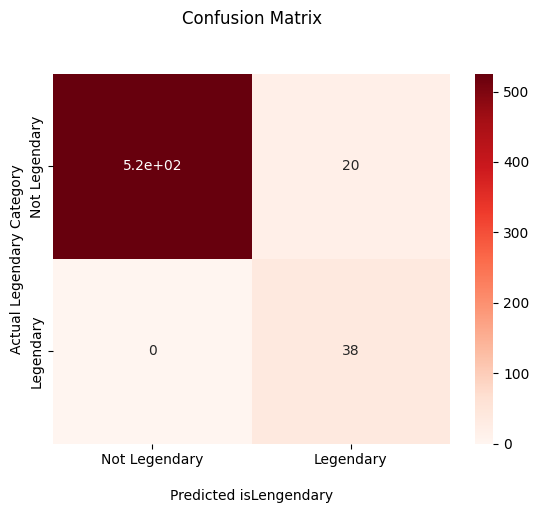

Fold:  3, Training/Test Split Distribution: [545  38], Accuracy: 0.938
Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98
TP: 532
FN: 13
FP: 0
TN: 38
Specificity: 0.06666666666666667
Sensitivity: 0.9761467889908257
The AUC is: 0.9880733944954129


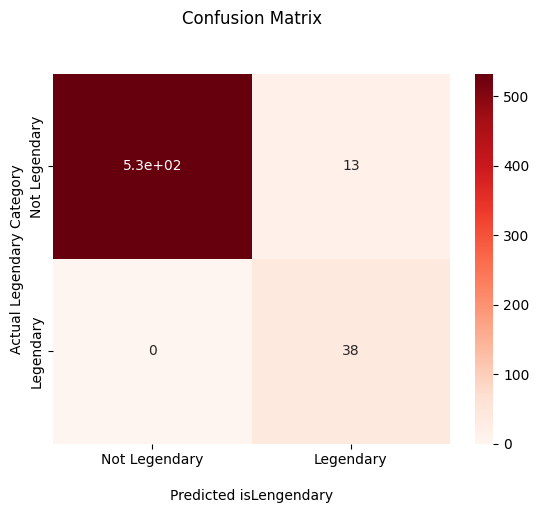

Fold:  4, Training/Test Split Distribution: [545  38], Accuracy: 0.954
Weighted Precision: 0.99
Weighted Recall: 0.98
Weighted F1-score: 0.98
TP: 535
FN: 10
FP: 0
TN: 38
Specificity: 0.06631762652705062
Sensitivity: 0.981651376146789
The AUC is: 0.9908256880733946


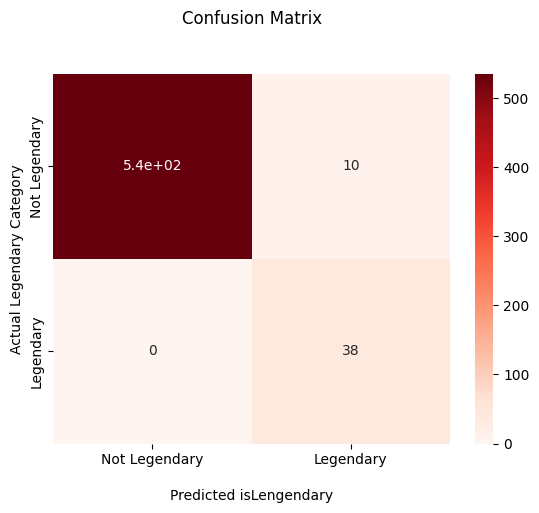

Fold:  5, Training/Test Split Distribution: [545  38], Accuracy: 0.969
Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98
TP: 544
FN: 1
FP: 12
TN: 26
Specificity: 0.0456140350877193
Sensitivity: 0.998165137614679
The AUC is: 0.8411878319652342


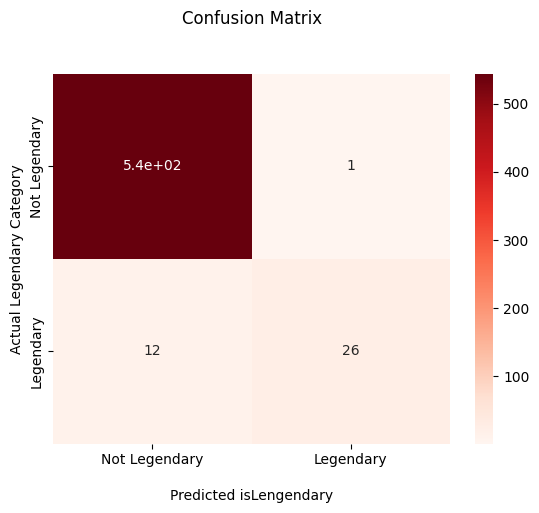

Fold:  6, Training/Test Split Distribution: [545  38], Accuracy: 0.985
Weighted Precision: 1.00
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 542
FN: 3
FP: 0
TN: 38
Specificity: 0.06551724137931035
Sensitivity: 0.9944954128440368
The AUC is: 0.9972477064220183


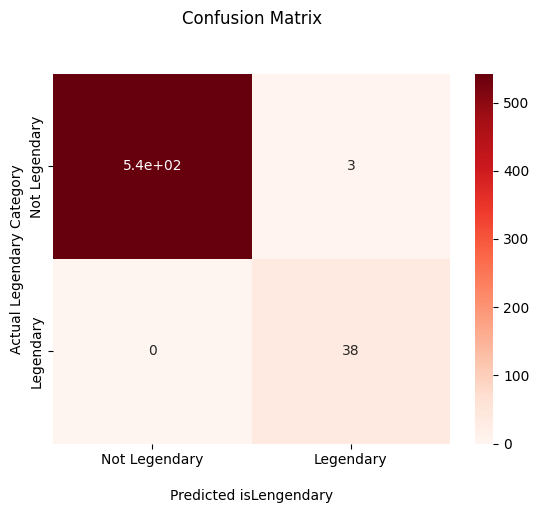

Fold:  7, Training/Test Split Distribution: [546  37], Accuracy: 0.969
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 543
FN: 3
FP: 2
TN: 35
Specificity: 0.06055363321799308
Sensitivity: 0.9945054945054945
The AUC is: 0.9702257202257203


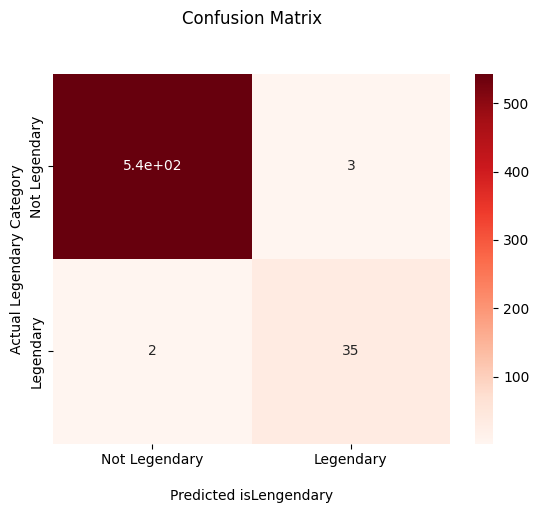

Fold:  8, Training/Test Split Distribution: [546  37], Accuracy: 0.954
Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.97
TP: 545
FN: 1
FP: 13
TN: 24
Specificity: 0.0421792618629174
Sensitivity: 0.9981684981684982
The AUC is: 0.8234085734085734


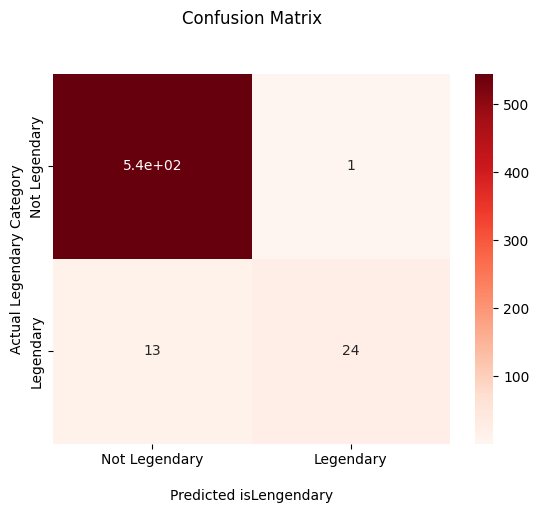

Fold:  9, Training/Test Split Distribution: [546  38], Accuracy: 1.000
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 544
FN: 2
FP: 3
TN: 35
Specificity: 0.06044905008635579
Sensitivity: 0.9963369963369964
The AUC is: 0.9586948139579718


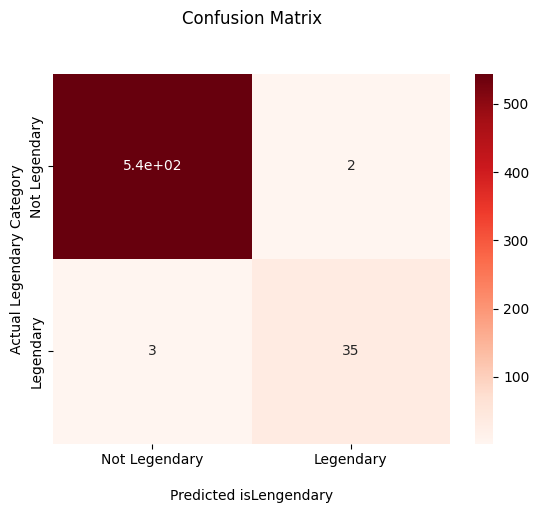

Fold: 10, Training/Test Split Distribution: [546  38], Accuracy: 1.000
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 543
FN: 3
FP: 1
TN: 37
Specificity: 0.06379310344827586
Sensitivity: 0.9945054945054945
The AUC is: 0.9840948525159052


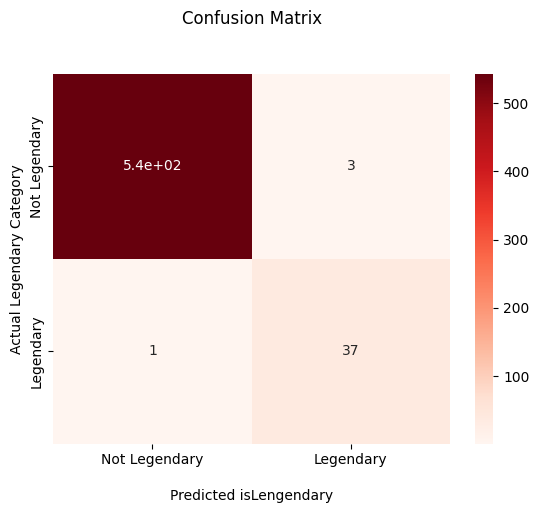



Cross-Validation accuracy: 0.974 +/- 0.021


In [48]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pokemon_x,pokemon_y,train_size = 0.9, random_state=10)


per_clf = Perceptron(max_iter=100, tol=1e-3)

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    per_clf.fit(X_train.iloc[train, :], y_train.iloc[train])
    predict = per_clf.predict(X_train.iloc[train, :])
    score = per_clf.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    matrix = confusion_matrix(y_train.iloc[train], predict)
    calculate_metrics(matrix,y_train.iloc[train],predict)
    plot_matrix(matrix)
    
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

